Это для задания из https://www.coursera.org/learn/python-for-data-science/peer/1m2TX/vizualizatsiia-datasieta

In [40]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import plotly.express as px
import plotly.offline as of


import os

paths = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pt = os.path.join(dirname, filename)
        print(pt)
        paths.append(pt)



/kaggle/input/fifa-18-demo-player-dataset/PlayerAttributeData.csv
/kaggle/input/fifa-18-demo-player-dataset/PlayerPersonalData.csv
/kaggle/input/fifa-18-demo-player-dataset/PlayerPlayingPositionData.csv
/kaggle/input/fifa-18-demo-player-dataset/CompleteDataset.csv


In [41]:
df1 = pd.read_csv(paths[1])

df1.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


Гистограмма возраста игроков показывает количество игроков каждой группы возраста

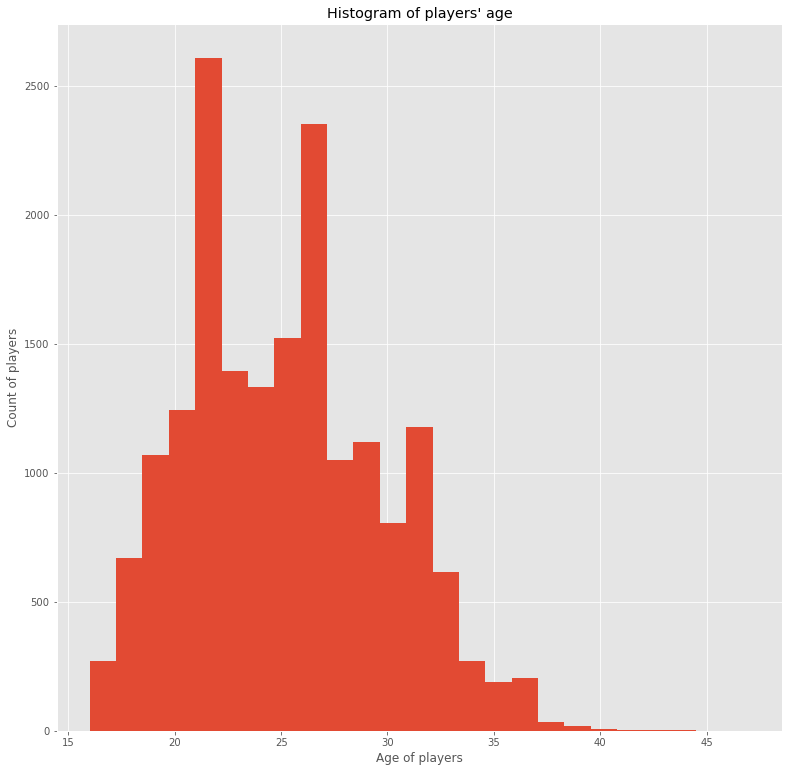

In [42]:
df1['Age'].hist(bins = 25, figsize=(13,13))
plt.xlabel('Age of players')
plt.ylabel('Count of players')
plt.title("Histogram of players' age")

fig = plt.gcf()
fig.savefig('plot1.png')

По графику пар Overall-Potential видно, что Potential всегда не меньше Overall

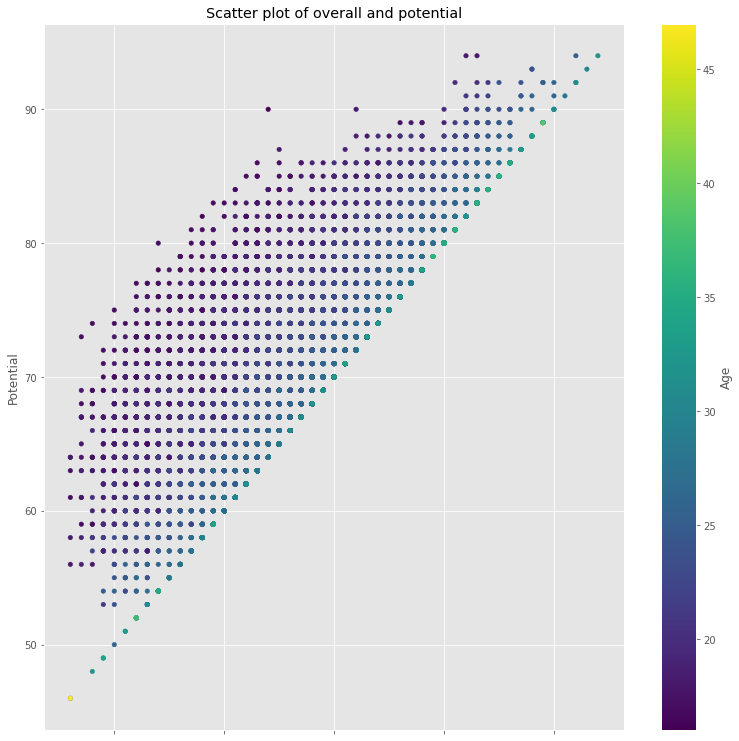

In [43]:
df1.plot.scatter('Overall','Potential', figsize=(13,13), marker = 'o', c = 'Age', colormap='viridis')
plt.xlabel('Overall')
plt.title("Scatter plot of overall and potential")

fig = plt.gcf()
fig.savefig('plot2.png')

По этому графику видно, что между возрастом и Overall есть параболическая зависимость

In [44]:
fig = px.scatter(df1, x="Age", y="Overall", color="Nationality",
                 size='Potential', hover_data = ['Name'],
                title = 'Overall by Age')

fig.show()

of.plot(fig, filename='fig1.html')

'fig1.html'

Тут я просто показываю распределение возраста для игроков нескольких разных клубов

In [45]:
df2 = df1.dropna()
df2 = df2[ (df2['Club'] == 'FC Barcelona') | (df2['Club'] == 'Real Madrid CF') | (df2['Club'] == 'Chelsea')]
df2.head()

fig = px.histogram(df2, x="Age", color="Club", nbins =10, opacity = 0.8, barmode="group",

                title = 'Count of players by Age (Histogram)')
fig.show()

of.plot(fig, filename='fig2.html')

'fig2.html'